# Predicting the future of a stock price
### Antonis Karaolis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-01,28.639999,28.660000,28.360001,28.610001,23.726900,29201100
1,2013-04-02,28.590000,28.850000,28.520000,28.799999,23.884474,28456500
2,2013-04-03,28.750000,28.950001,28.540001,28.559999,23.685434,35062800
3,2013-04-04,28.389999,28.610001,28.270000,28.600000,23.718605,45263200
4,2013-04-05,28.219999,28.780001,28.110001,28.700001,23.801537,50927300
...,...,...,...,...,...,...,...
2514,2023-03-24,277.239990,280.630005,275.279999,280.570007,280.570007,28172000
2515,2023-03-27,280.500000,281.459991,275.519989,276.380005,276.380005,26840200
2516,2023-03-28,275.790009,276.140015,272.049988,275.230011,275.230011,21878600
2517,2023-03-29,278.959991,281.140015,278.410004,280.510010,280.510010,25087000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2519 non-null   object 
 1   Open       2519 non-null   float64
 2   High       2519 non-null   float64
 3   Low        2519 non-null   float64
 4   Close      2519 non-null   float64
 5   Adj Close  2519 non-null   float64
 6   Volume     2519 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.9+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2.519000e+03
mean,127.230873,128.517713,125.897130,127.274208,122.587496,3.192936e+07
std,90.895959,91.905570,89.820422,90.907226,91.833106,1.661098e+07
min,28.219999,28.610001,28.110001,28.559999,23.685434,7.425600e+06
25%,48.424999,48.875000,48.035000,48.440000,42.288302,2.236540e+07
50%,93.750000,94.930000,92.830002,93.849998,88.497749,2.807900e+07
75%,212.184998,214.705001,209.824997,212.334999,207.551209,3.629040e+07
max,344.619995,349.670013,342.200012,343.109985,339.075531,2.484285e+08


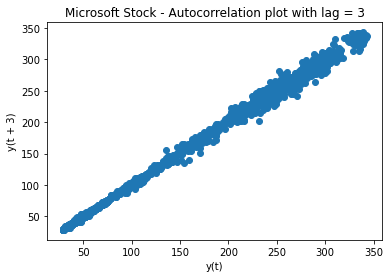

In [5]:
plt.figure()
lag_plot(df['Close'], lag=3)
plt.title('Microsoft Stock - Autocorrelation plot with lag = 3')
plt.show()

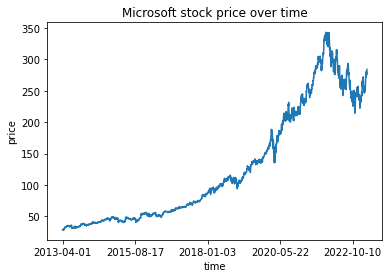

In [6]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,2500, 600), df['Date'][0:2500:600])
plt.title("Microsoft stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [7]:
train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 32.48513542012387


In [8]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2518
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -6246.531
Date:                Mon, 15 May 2023   AIC                          12503.062
Time:                        12:12:46   BIC                          12532.216
Sample:                             0   HQIC                         12513.642
                               - 2518                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1075      0.010    -10.638      0.000      -0.127      -0.088
ar.L2         -0.0178      0.010     -1.738      0.082      -0.038       0.002
ar.L3         -0.0353      0.011     -3.130      0.0

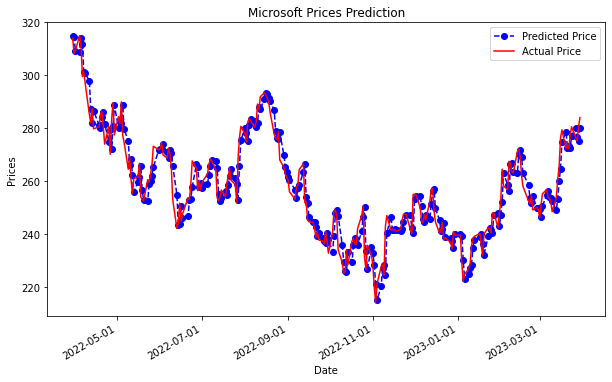

In [9]:
import matplotlib.dates as mdates

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

test_set_range = df[int(len(df)*0.9):].index

fig, ax = plt.subplots(figsize=(10,6))
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
ax.plot(test_set_range, test_data, color='red', label='Actual Price')

ax.set_title('Microsoft Prices Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
ax.legend()

plt.show()